In [209]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

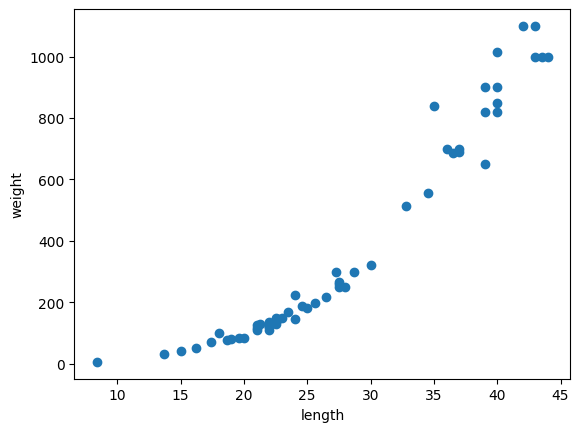

In [210]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [211]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [212]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)
print(train_input)

(42,) (14,)
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [213]:
import numpy as np

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [214]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(train_input, train_target)
# 2, 3, 9


KNeighborsRegressor(n_neighbors=2)

In [215]:
predicted_values = knr.predict(test_input)

In [216]:
knr.predict([[20.0]])

array([85.])

In [217]:
knr.score(test_input, test_target)

0.9725010241788556

In [218]:
knr.score(train_input, train_target)

0.9828437127041165

In [219]:
# 모델의 평가
# 좋은 모델 = score -> train > test
# train < test => 과소적합

In [220]:
t_input = test_input[2]
p = knr.predict(t_input.reshape(-1, 1))

In [221]:
print(f"예측 사용 무게:{p}")
print(f"실 무게: {test_target[2]}")

예측 사용 무게:[262.5]
실 무게: 250.0


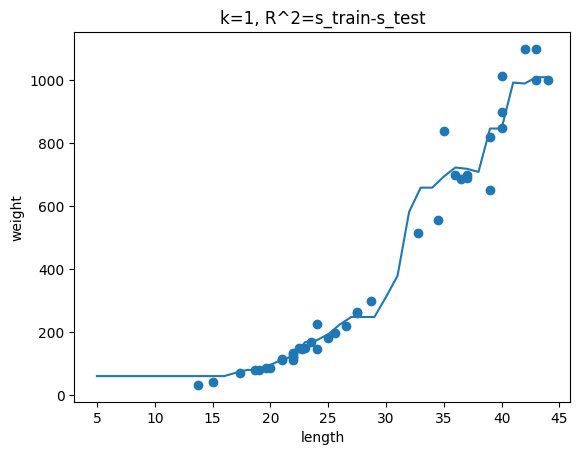

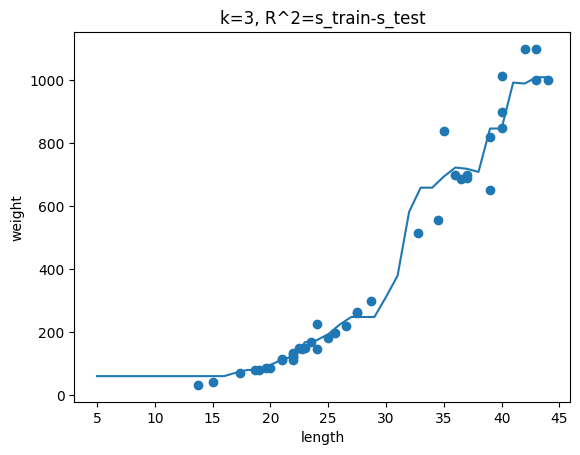

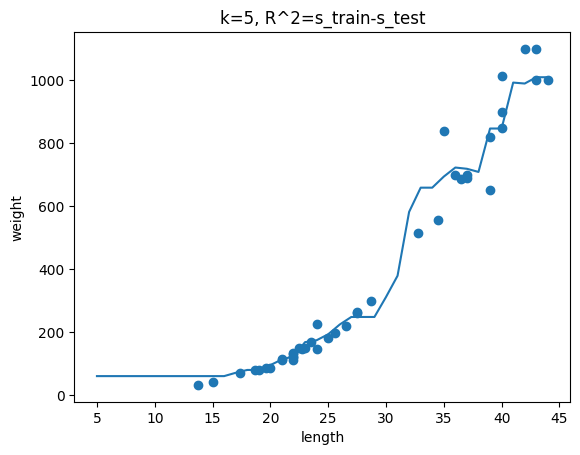

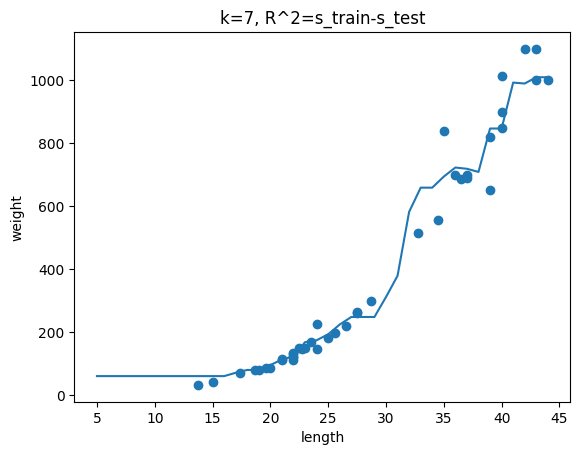

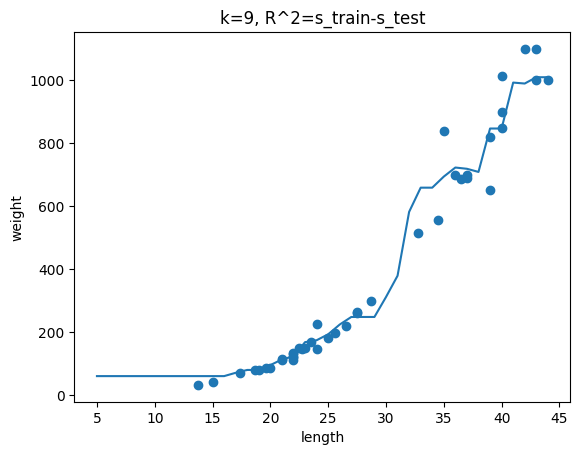

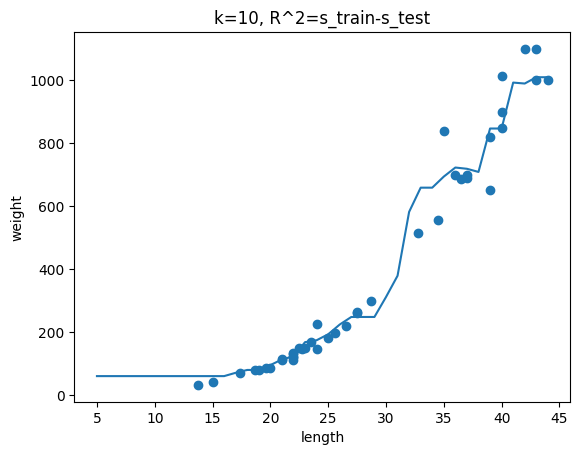

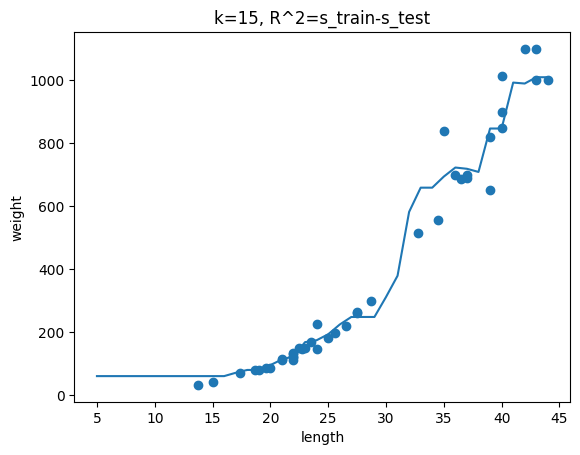

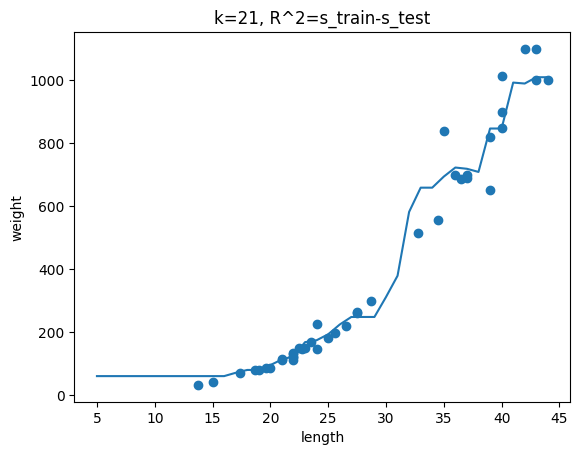

In [233]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for k in [1 ,3, 5, 7, 9, 10, 15, 21]:
    knr.n_neigbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    # 결정R^2
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)
    
    plt.title(f"k={k}, R^2=s_train-s_test")
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.xlabel("length")
    plt.ylabel("weight")
    plt.show()

In [237]:
knr = KNeighborsRegressor()
knr.n_neigbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[45]]))

[1010.]


In [238]:
print(knr.predict([[46]]))

[1010.]


In [239]:
print(knr.predict([[47]]))

[1010.]


In [240]:
print(knr.predict([[48]]))

[1010.]


In [241]:
print(knr.predict([[49]]))

[1010.]


In [242]:
print(knr.predict([[50]]))

[1010.]


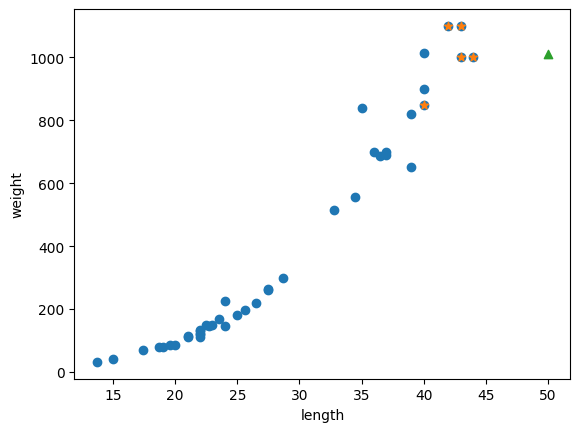

In [266]:
# 이웃을 찾아 차트로 그리기
w = 50
d, i = knr.kneighbors([[w]])

# 훈련데이터의 산점도 추가
plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='*')
plt.scatter(w, knr.predict([[w]])[0], marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)